0.9475


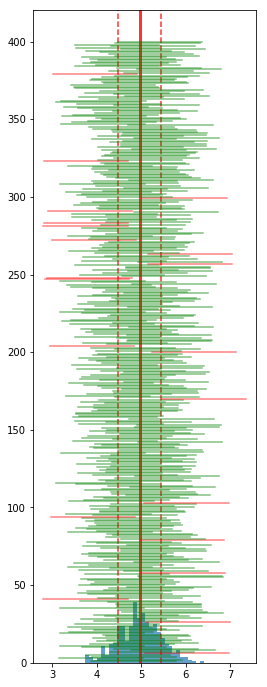

In [27]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

plt.close()
fig = plt.figure('CIs', figsize=[4, 12])
ax = fig.add_subplot(111)

N = 30

# 400 samples of size N
samples = np.random.normal(5, 2.5, 12000).reshape([-1, N])

# Estimate the sampling distribution
x_bars = samples.mean(axis=1)
mu = x_bars.mean()
se = x_bars.std()

# Plot the sampling distribution
ax.hist(x_bars, bins=30, alpha=.7)
ax.axvline(mu, color='red', lw=3, alpha=.8)
ax.axvline(mu+se, color='red', ls='--', lw=1.5, alpha=.8)
ax.axvline(mu-se, color='red', ls='--', lw=1.5, alpha=.8)

# Construct confidence intervals
ci_size = .95
z_crit = stats.norm.ppf(1-(1-ci_size)/2, 0, 1)
ci = z_crit*se

# Plot mean and CI for each sample and color green if it includes the "true" mean
includes = []
for i, sample in enumerate(samples):
    L = x_bars[i]-ci
    U = x_bars[i]+ci
    mean_in_ci = int((mu>L)&(mu<U))
    ax.plot([L, U], [i+1, i+1], color=['red','green'][mean_in_ci], alpha=.5)
    includes.append(mean_in_ci)

# How many CIs include the mean?
print(np.mean(includes))